In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.linear_model  import LogisticRegression

In [13]:
data_heart = pd.read_csv('heart.csv')
data_heart.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [14]:
data_saturation = pd.read_csv('o2Saturation.csv')
data_saturation.shape

(3585, 1)

In [15]:
x_variables = ['age', 'sex', 'cp',	'trtbps',	'chol',	'fbs', 'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall']
y_variable  = 'output'

In [16]:
X = data_heart[x_variables]
y = data_heart[y_variable]
y.unique()

array([1, 0], dtype=int64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [9]:

# params_decision_tree = { 'kernel' : ['linear', 'rbf'],        'C': np.arange(1, 10, 1) }



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_DecisionTree  = {'max_depth'   : [3, 4, 5, 6, 7, 8, 9]}
param_ExtraTree     = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'max_depth'     : [3, 4, 5, 6, 7, 8, 9]}
param_RandomForest  = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'max_depth'     : [3, 4, 5, 6, 7, 8, 9]}
param_AdaBoost      = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'learning_rate' : [0.01, 0.1, 1, 10, 100, 1000]}
param_SklGBM        = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'learning_rate' : [0.01, 0.1, 1, 10, 100, 1000]}
param_XGBoost       = {'booster'     : ['gbtree', 'gblinear'],           'eta'           : [0.01, 0.1, 1, 10, 100, 1000] }
param_LightGBM      = {'n_estimators': [0.01, 0.1, 1, 10, 100, 1000],    'learning_rate' : [0.01, 0.1, 1, 10, 100, 1000]}
param_LogisticRegr  = {'C'           : [0.01, 0.1, 1, 10, 100, 1000],    'max_iter'      : [10, 50, 100, 150, 200, 1000]}
param_SVC           = {'kernel'      : ['linear', 'rbf'],                  'C'           : [0.01, 0.1, 1, 10, 100, 1000]}      # 'gamma'         : [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,      


grid_search_DecisionTree      = GridSearchCV(DecisionTreeClassifier(), param_DecisionTree, cv=5)
grid_search_ExtraTree         = GridSearchCV(ExtraTreesClassifier(), param_ExtraTree, cv=5)
grid_search_RandomForest      = GridSearchCV(RandomForestClassifier(), param_RandomForest, cv=5)
grid_search_AdaBoost          = GridSearchCV(AdaBoostClassifier(), param_AdaBoost, cv=5)
grid_search_SklGBM            = GridSearchCV(GradientBoostingClassifier(), param_SklGBM, cv=5)
grid_search_XGBoost           = GridSearchCV(XGBClassifier(), param_XGBoost, cv=5)
grid_search_LightGBM          = GridSearchCV(LGBMClassifier(), param_LightGBM, cv=5)
grid_search_LogisticRegr      = GridSearchCV(LogisticRegression(), param_LogisticRegr, cv=5)
grid_search_SVC               = GridSearchCV(SVC(), param_SVC, cv=5)



In [ ]:
grid_search_DecisionTree.fit(X_train, y_train)
grid_search_ExtraTree.fit(X_train, y_train)
grid_search_RandomForest.fit(X_train, y_train)
grid_search_AdaBoost.fit(X_train, y_train)
grid_search_SklGBM.fit(X_train, y_train)
grid_search_XGBoost.fit(X_train, y_train)
grid_search_LightGBM.fit(X_train, y_train)
grid_search_LogisticRegr.fit(X_train, y_train)
grid_search_SVC.fit(X_train, y_train)


In [21]:
print(f'Decision Tree    =>    Best Score : {round(grid_search_DecisionTree.best_score_ * 100, 2)}    Best Parameters :   {grid_search_DecisionTree.best_params_}  ')
print(f'Extra Trees      =>    Best Score : {round(grid_search_ExtraTree.best_score_ * 100, 2)}    Best Parameters :   {grid_search_ExtraTree.best_params_}  ')
print(f'Random Forest    =>    Best Score : {round(grid_search_RandomForest.best_score_ * 100, 2)}    Best Parameters :   {grid_search_RandomForest.best_params_}  ')
print(f'AdaBoost         =>    Best Score : {round(grid_search_AdaBoost.best_score_ * 100, 2)}    Best Parameters :   {grid_search_AdaBoost.best_params_}  ')
print(f'Skl GBM          =>    Best Score : {round(grid_search_SklGBM.best_score_ * 100, 2)}    Best Parameters :   {grid_search_SklGBM.best_params_}  ')
print(f'XGBoost          =>    Best Score : {round(grid_search_XGBoost.best_score_ * 100, 2)}    Best Parameters :   {grid_search_XGBoost.best_params_}  ')
print(f'LightGBM         =>    Best Score : {round(grid_search_LightGBM.best_score_ * 100, 2)}    Best Parameters :   {grid_search_LightGBM.best_params_}  ')
print(f'LogisticRegr     =>    Best Score : {round(grid_search_LogisticRegr.best_score_ * 100, 2)}    Best Parameters :   {grid_search_LogisticRegr.best_params_}  ')
print(f'SVC              =>    Best Score : {round(grid_search_SVC.best_score_ * 100, 2)}    Best Parameters :   {grid_search_SVC.best_params_}  ')



Decision Tree    =>    Best Score : 77.57    Best Parameters :   {'max_depth': 6}  
Extra Trees      =>    Best Score : 85.04    Best Parameters :   {'max_depth': 5, 'n_estimators': 1000}  
Random Forest    =>    Best Score : 83.73    Best Parameters :   {'max_depth': 4, 'n_estimators': 100}  
AdaBoost         =>    Best Score : 82.39    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 1000}  
Skl GBM          =>    Best Score : 79.3    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 100}  
XGBoost          =>    Best Score : 82.85    Best Parameters :   {'booster': 'gblinear', 'eta': 0.1}  
LightGBM         =>    Best Score : 83.28    Best Parameters :   {'learning_rate': 0.1, 'n_estimators': 10}  
LogisticRegr     =>    Best Score : 82.85    Best Parameters :   {'C': 10, 'max_iter': 150}  
SVC              =>    Best Score : 81.96    Best Parameters :   {'C': 0.1, 'kernel': 'linear'}  


In [ ]:
"""
Decision Tree    =>    Best Score : 77.57    Best Parameters :   {'max_depth': 6}  
Extra Trees      =>    Best Score : 85.04    Best Parameters :   {'max_depth': 5, 'n_estimators': 1000}  
Random Forest    =>    Best Score : 83.73    Best Parameters :   {'max_depth': 4, 'n_estimators': 100}  
AdaBoost         =>    Best Score : 82.39    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 1000}  
Skl GBM          =>    Best Score : 79.30    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 100}  
XGBoost          =>    Best Score : 82.85    Best Parameters :   {'booster': 'gblinear', 'eta': 0.1}  
LightGBM         =>    Best Score : 83.28    Best Parameters :   {'learning_rate': 0.1, 'n_estimators': 10}  
LogisticRegr     =>    Best Score : 82.85    Best Parameters :   {'C': 10, 'max_iter': 150}  
SVC              =>    Best Score : 81.96    Best Parameters :   {'C': 0.1, 'kernel': 'linear'} 

"""


In [14]:
#   "Decision Tree":  DecisionTreeClassifier(max_depth=4, random_state=15),
#   "Extra Trees":    ExtraTreesClassifier(n_estimators=100, random_state=15),
#   "Random Forest":  RandomForestClassifier(n_estimators=100, random_state=15),
#   "AdaBoost":       AdaBoostClassifier(n_estimators=100, random_state=15),
#   "Skl GBM":        GradientBoostingClassifier(n_estimators=100, random_state=15),
#   "XGBoost":        XGBClassifier(n_estimators=100, random_state=15),
#   "LightGBM":       LGBMClassifier(n_estimators=100, random_state=15),
#   "CatBoost":       CatBoostClassifier(n_estimators=100, random_state=15),
#   'LogisticRegr':   LogisticRegression(random_state=15),
#   'SVC' :           SVC(C=10, gamma=0.001)

In [15]:
# print('Decision Tree Train Accuracy :  ', round(tree.score(X_train, y_train) * 100, 2))
# print('Decision Tree Test  Accuracy :  ', round(tree.score(X_test, y_test) * 100, 2))
# print()
# print('Random Forest Train Accuracy :  ', round(rand.score(X_train, y_train) * 100, 2))
# print('Random Forest Test  Accuracy :  ', round(rand.score(X_test, y_test) * 100, 2))
# print()
# print('Logistic Regression Train Accuracy :  ', round(logic.score(X_train, y_train) * 100, 2))
# print('Logistic Regression Test Accuracy :  ', round(logic.score(X_test, y_test) * 100, 2))

In [16]:
# tree_classifiers = {
  
#   "Decision Tree":  DecisionTreeClassifier(max_depth=4),
#   "Extra Trees":    ExtraTreesClassifier(n_estimators=100),
#   "Random Forest":  RandomForestClassifier(n_estimators=100),
#   "AdaBoost":       AdaBoostClassifier(n_estimators=100),
#   "Skl GBM":        GradientBoostingClassifier(n_estimators=100),
#   "XGBoost":        XGBClassifier(n_estimators=100, random_state=15),
#   "LightGBM":       LGBMClassifier(n_estimators=100, random_state=15),
#   "CatBoost":       CatBoostClassifier(n_estimators=100, random_state=15),
#   'LogisticRegr':   LogisticRegression(random_state=15),
#   'SVC' :           SVC(C=10, gamma=0.001)
# }

In [17]:
# tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}

# results = pd.DataFrame({'Model': [], 'MSE': [], 'MAB': [], 'Time': []})



In [ ]:
# import time
# for model_name, model in tree_classifiers.items():
    
#     start_time = time.time()
#     model.fit(X_train, y_train)
#     total_time = time.time() - start_time
        
#     pred = model.predict(X_test)
    
#     rang = abs(y_train.max()) - abs(y_train.min())

#     results = results.append({"Model":          model_name,
#                               "MSE":            metrics.mean_squared_error(y_test, pred),
#                               "MAB":            metrics.mean_absolute_error(y_test, pred),
#                               " % error":       metrics.mean_squared_error(y_test, pred) / rang,
#                               "Accuracy Score": model.score(X_test,y_test),
#                               "Time":           total_time},
#                               ignore_index=True)



In [ ]:
# decision_tree  =    DecisionTreeClassifier(max_depth=4, random_state=15)
# random_forest  =    RandomForestClassifier(n_estimators=100, random_state=15)
# logistic       =    LogisticRegression(random_state=15)
# extra_trees    =    ExtraTreesClassifier(n_estimators=100, random_state=15)
# ada_boost      =    AdaBoostClassifier(n_estimators=100, random_state=15)
# skl_GBM        =    GradientBoostingClassifier(n_estimators=100, random_state=15)
# xG_Boost       =    XGBClassifier(n_estimators=100, random_state=15)
# lightGBM       =    LGBMClassifier(n_estimators=100, random_state=15)
# catBoost       =    CatBoostClassifier(n_estimators=100, random_state=15)

# decision_tree.fit(X_train, y_train)
# random_forest.fit(X_train, y_train)
# logistic.fit(X_train, y_train)
# extra_trees.fit(X_train, y_train)
# ada_boost.fit(X_train, y_train)
# skl_GBM.fit(X_train, y_train)
# xG_Boost.fit(X_train, y_train)
# lightGBM.fit(X_train, y_train)
# catBoost.fit(X_train, y_train)


In [ ]:
# print(f'DECISION TREE         : Train {round(decision_tree.score(X_train, y_train) * 100, 2)} :     Test : {round(decision_tree.score(X_test, y_test) * 100, 2)}')
# print(f'RANDOM FOREST         : Train {round(random_forest.score(X_train, y_train) * 100, 2)} :     Test : {round(random_forest.score(X_test, y_test) * 100, 2)}')
# print(f'LOGISTIC REGRESSION   : Train {round(logistic.score(X_train, y_train) * 100, 2)} :     Test : {round(logistic.score(X_test, y_test) * 100, 2)}')
# print(f'EXTRA TREES           : Train {round(extra_trees.score(X_train, y_train) * 100, 2)} :  Test : {round(extra_trees.score(X_test, y_test) * 100, 2)}')
# print(f'ADA BOOST             : Train {round(ada_boost.score(X_train, y_train) * 100, 2)} :    Test : {round(ada_boost.score(X_test, y_test) * 100, 2)}')
# print(f'SKL GBM               : Train {round(skl_GBM.score(X_train, y_train) * 100, 2)} :      Test : {round(skl_GBM.score(X_test, y_test) * 100, 2)}')
# print(f'XG BOOST              : Train {round(xG_Boost.score(X_train, y_train) * 100, 2)} :     Test : {round(xG_Boost.score(X_test, y_test) * 100, 2)}')
# print(f'LIGHT GBM             : Train {round(lightGBM.score(X_train, y_train) * 100, 2)} :     Test : {round(lightGBM.score(X_test, y_test) * 100, 2)}')
# print(f'CAT BOOST             : Train {round(catBoost.score(X_train, y_train) * 100, 2)} :     Test : {round(catBoost.score(X_test, y_test) * 100, 2)}')

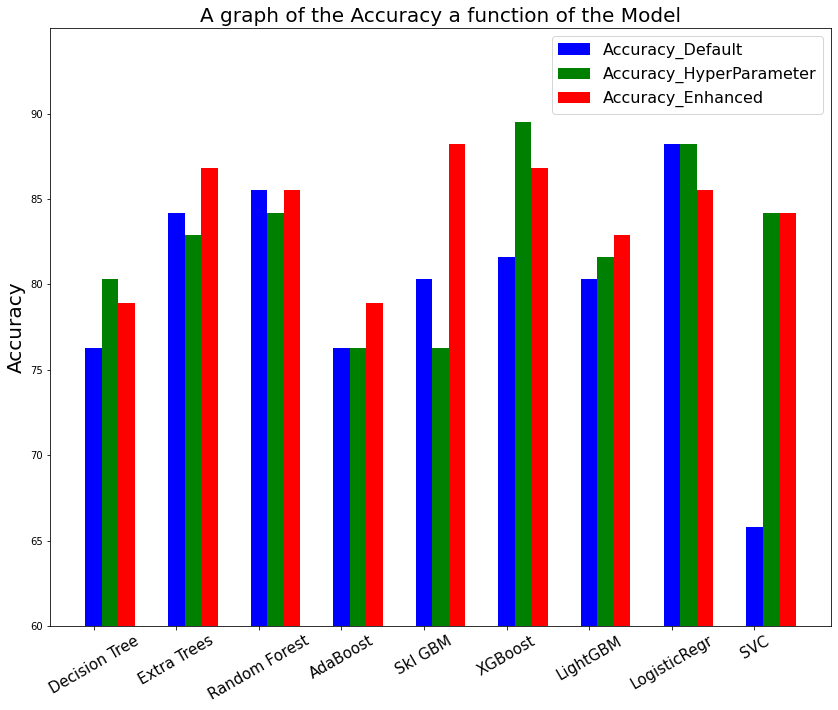

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

data1 = pd.read_csv('accuracy_default_parameters')
data2 = pd.read_csv('accuracy_hyper_parameters')
data3 = pd.read_csv('accuracy_data_enhanced')

# print(data1)
# print(data2)
# print(data3)


accuracy = pd.concat([data1[['Model',  'Accuracy_Default']], data2['Accuracy_HyperParameter'], data3['Accuracy_Enhanced']], axis=1)

data1 = accuracy['Accuracy_Default']
data2 = accuracy['Accuracy_HyperParameter']
data3 = accuracy['Accuracy_Enhanced']


X = np.arange(9)

# fig = plt.figure(figsize=(10, 8))

plt.figure(figsize=(14, 11))
# ax = fig.add_axes([0,0,1,1])

plt.bar(X + 0.0, data1, color = 'b', width = 0.2)
plt.bar(X + 0.2, data2, color = 'g', width = 0.2)
plt.bar(X + 0.4, data3, color = 'r', width = 0.2)

plt.ylabel('Accuracy', fontsize=20)
plt.title('A graph of the Accuracy a function of the Model', fontsize=20)
plt.ylim(60, 95)
plt.xticks(X, accuracy['Model'], rotation=30, fontsize=15)
plt.yticks(np.arange(60, 95, 5))
plt.legend(labels=['Accuracy_Default', 'Accuracy_HyperParameter', 'Accuracy_Enhanced'], fontsize=16)

plt.show()

plt.savefig('accuracy_vs_models')

In [9]:
print(accuracy)

           Model  Accuracy_Default  Accuracy_HyperParameter  Accuracy_Enhanced
0  Decision Tree              76.3                     80.3               78.9
1    Extra Trees              84.2                     82.9               86.8
2  Random Forest              85.5                     84.2               85.5
3       AdaBoost              76.3                     76.3               78.9
4        Skl GBM              80.3                     76.3               88.2
5        XGBoost              81.6                     89.5               86.8
6       LightGBM              80.3                     81.6               82.9
7   LogisticRegr              88.2                     88.2               85.5
8            SVC              65.8                     84.2               84.2
